# Loading and Describing Data Using Pandas
## Notebook Outline:

* [Introduction To Pandas](#IntroToPandas)
* [Loading A Standard CSV File With Pandas](#LoadingStandardCSV)
* [Basic Data Description](#BasicDataDescription)
* [Loading A Data File With Tab Delimited Fields](#LoadingTabDataFile)
* [Loading A Data File With White Space Delimited Fields](#LoadingWhiteSpaceFile)
* [Lesson Summary](#LessonSummary)

# How to use this Notebook

The best way to use this notebook is to follow along with the lecture and then to apply what you learn to your own data files, or (if you do not have any of your own data) to practice using this functions and methods on the provided data. A little practice goes a long way towards understand and retaining! It would be easy to just skim this notebook, but you will learn more by doing!

<a name="IntroToPandas"></a>
#  Introduction To Pandas - What is Pandas?
### From the Pandas website:
http://pandas.pydata.org/

"pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language."

If you are familiar with Excel, think of Pandas as a similar tool to explore and analyze data. There are big differences between Pandas and Excel (Pandas is faster, can handle larger datasets more efficiently, and can do more overall, but does not have GUI), but they can be used for similar purposes and having that comparison in your mind may help you digest the information.

### My experience with Pandas:

I use Pandas everyday, along with Jupyter Notebook, to explore and analyze client data. It is an integral part of my real-world-workflow.

<a name='LoadingStandardCSV'></a>
# Loading A Standard CSV File With Pandas
In the below cells, we import pandas. Then, we load a file of the most popular baby boy names used in Illinois from 1980 to 2013. Please see the comments in each cell below for more details about the code in each cell. Also - please see the lecture videos that walk through this notebook!

Also, we will be using the read_csv() method extensively, and introducing some of its arguments.  If you'd like, you can refer to its documentation here <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html>

In [1]:
# First we must import pandas.  It is very common to import pandas as pd.  All
# this means is that I can refer to pandas as 'pd' in my code - saving myself
# from typing 4 more characters and also saving space.

import pandas as pd

In [5]:
# Next, we need to define the filepath to our file.  We will go over this in 
# the lecture. Also note that I wrap the path in parentheses, this allows me
# to write the string on multiple lines. This just keeps my code tidy. I will
# explain this more in the video.

filepath = ('/Users/williamhenry/Documents/UCI/Courses/'
            'IntroToPythonForDataScience/Course Material/data/'
            'Most_Popular_Baby_Boy_Names__Illinois_1980-2013.csv')

In [6]:
# Now we can load our data.  It is pretty simple, we just use the read_csv()
# method. Method docs can be found here:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

nameData = pd.read_csv(filepath)

<a name='BasicDataDescription'></a>
# Basic Data Description

Now we start our basic data description!  Unfortunately, "basic" can sometimes sound like something is not interesting, or not "the good stuff" - this is definitely not true in this case. It is realtively simple, but it is very important to have a solid high-level understanding of your data before you dive in deeper. If you skip this, you will end up paying for it later.

In [7]:
print(type(nameData))

<class 'pandas.core.frame.DataFrame'>


#### The .head() method can be used to get the first n lines of a dataframe. It is always a good idea to just 'look' at your data.

In [8]:
# Below we print the first 3 lines of the data file. The default number of
# lines printed is 5
nameData.head(3)

,Rank,Year,Name,Frequency
0,1,1980,Michael,3886
1,2,1980,Jason,2389
2,3,1980,Christopher,2273


#### The .tail() method can be used to get the last n lines of a dataframe.

In [9]:
nameData.tail(3)

,Rank,Year,Name,Frequency
847,23,2013,HENRY,463
848,24,2013,DAVID,461
849,25,2013,JACK,440


We just learned something by looking at the data - it looks like the names were entered in all caps in some of the data. This will be important later.

#### The .sample() method can be used to get a random smaple of n rows from the dataframe.

In [10]:
nameData.sample(5)

,Rank,Year,Name,Frequency
796,22,2011,JAMES,477
813,14,2012,NATHAN,519
697,23,2007,NOAH,596
203,4,1988,Daniel,1938
40,16,1981,William,1176


#### The .shape _attribute_ will tell us the size of the file; the number of rows and the number of columns.

In [15]:
nameData.shape

(850, 4)

#### The .columns attribute will tell us the names of the columns.

In [12]:
nameData.columns

Index(['Rank', 'Year', 'Name', 'Frequency'], dtype='object')

#### The .dtypes attribute will display the variable type of each column.
* This can be helpful in detemrining what the contents of each column is (see the auto mpg example below).
* 'object' is used for strings or other variable types thare not numbers or dates.  For example, lists or tuples, which can be stored in a dataframe, but that is rare - most of the time, when you see 'object' it means the column contains strings.


In [13]:
nameData.dtypes

Rank          int64
Year          int64
Name         object
Frequency     int64
dtype: object

#### The .info() method will also tell is the datatype, but with some additional info about the size of the dataframe and the number of non-null entries. 
A null entry would be one that is _empty_ in the dataset.  Remember that sometimes the dataset already comes with null or missing values marked with a special value, like -9999 (we will see this in the weather data example). Pandas will not immediately recognize this as a null value.

In [16]:
nameData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
Rank         850 non-null int64
Year         850 non-null int64
Name         850 non-null object
Frequency    850 non-null int64
dtypes: int64(3), object(1)
memory usage: 26.6+ KB


#### The .memory_usage() method gives the size of each column in bytes.
Note that if you add these together and divide by 1024 (1024 bytes = 1 KB), you get the same number that is shown in the output from .info()

In [17]:
nameData.memory_usage()

Index          80
Rank         6800
Year         6800
Name         6800
Frequency    6800
dtype: int64

#### The .describe() method outputs basic descriptive statistics about all of the _numerical_ columns in the dataframe.

In [18]:
nameData.describe()

,Rank,Year,Frequency
count,850.000000,850.000000,850.000000
mean,13.000000,1996.500000,1114.594118
std,7.215348,9.816485,519.512115
min,1.000000,1980.000000,440.000000
25%,7.000000,1988.000000,753.250000
50%,13.000000,1996.500000,1005.500000
75%,19.000000,2005.000000,1313.500000
max,25.000000,2013.000000,3886.000000


#### The .unique() method will output the unique values in a column.
In order to get a column from a dataframe, simple put the column name in square brackets after the dataframe variable. For example, we use nameData['Name'] below to get the name column of the dataframe. (We will cover indexing and slicing of dataframes in greater detail in a following lesson.)

In [20]:
nameData['Name'].unique()

array(['Michael', 'Jason', 'Christopher', 'Matthew', 'David', 'James',
       'Robert', 'Daniel', 'John', 'Joseph', 'Brian', 'Joshua', 'Ryan',
       'Nicholas', 'Eric', 'Justin', 'Timothy', 'William', 'Anthony',
       'Andrew', 'Adam', 'Thomas', 'Kevin', 'Steven', 'Jeremy', 'Jonathan',
       'Brandon', 'Kyle', 'Jospeh', 'Jonathon', 'Jacob', 'Zachary',
       'Alexander', 'Tyler', 'Austin', 'Dylan', 'Benjamin', 'Ethan',
       'Christian', 'Samuel', 'Zachery', 'Nathan', 'Jack', 'DANIEL',
       'JACOB', 'MICHAEL', 'ALEXANDER', 'JOSHUA', 'ANTHONY', 'MATTHEW',
       'JOSEPH', 'ETHAN', 'ANDREW', 'RYAN', 'CHRISTOPHER', 'NICHOLAS',
       'DAVID', 'WILLIAM', 'NATHAN', 'JOHN', 'BENJAMIN', 'JAMES', 'TYLER',
       'LOGAN', 'JACK', 'NOAH', 'JONATHAN', 'ANGEL', 'CHRISTIAN', 'JAYDEN',
       'AIDEN', 'JACKSON', 'MASON', 'LUCAS', 'LIAM', 'GABRIEL', 'ELIJAH',
       'HENRY'], dtype=object)

#### The .nunique() method will output the number of uniuqe values in a column

In [21]:
nameData['Name'].nunique()

78

#### The .value_counts() method will output the number of times each value occurs in a column. 
For example, we see that "Christoper" has been ranked 26 times, and 'CHRISTOPHER' 5 times.  So, in actuallity, the name has been ranked 31 times. We will come back to this in a future lecture.

In [22]:
nameData['Name'].value_counts()

Anthony        26
Daniel         26
James          26
Ryan           26
Matthew        26
Andrew         26
David          26
Michael        26
Nicholas       26
Christopher    26
Joshua         26
John           26
Joseph         25
William        24
Brandon        23
Kevin          23
Justin         19
Robert         18
Jacob          16
Jonathan       16
Tyler          15
Alexander      15
Eric           14
Zachary        14
Kyle           14
Brian          11
Thomas         11
Adam           10
Timothy        10
NOAH            8
               ..
Jason           7
JOSHUA          7
RYAN            6
JOHN            6
JAYDEN          6
Austin          6
AIDEN           6
Ethan           6
Samuel          5
JACKSON         5
CHRISTOPHER     5
LUCAS           4
Nathan          4
JACK            4
MASON           4
Dylan           4
JONATHAN        4
LIAM            3
TYLER           3
NICHOLAS        3
Jack            2
ANGEL           2
ELIJAH          2
Christian       2
Zachery   

# Brief summary of what you have learned so far:
* head(n) - get the first n rows
* tail(n) - get the last n rows
* sample(n) - get a random sample of n rows
* shape - get the number of rows and columns
* columns - get the column names
* dtypes - get the variable types of each column
* info() - get the variables types, non-null counts, and memory size of the dataframe
* memory_usage() - get the memory usage of each column of the data frame
* describe() - get basic summary statistics about each numerical column
* unique() - get the unique values in a column
* nunique() - get the number of unique values in a column
* value_counts() - get the occurence counts for each value in a column

<a name='LoadingTabDataFile'></a>
# Loading A Data File With Tab Separated Fields
Great work so far! You have learned how to use pandas to get a high-level description of your dataset.  We are now going to apply these same functions to another dataset, and also learn some new functionality (that I use often) in the process.

The next dataset we are going to load is a dataset of car models made from 1970 to 1982. The dataset includes the following attributes of each model: The mpg, number of cylinders, engine displacement, horsepower, weight, acceleration (m/s^2), model year and car name.

#### Introducing the 'sep' argument in the read_csv() method.
The sep argument allows us to specify the field separator that pandas should use when attempting to read in the data. Below, we set it to the tab escape sequence which is '\t'. (This just means that '\t' indicates a tab). Note that the default value for the 'sep' argument is ',' which is why we do not have to set it when reading in comma separated data.

In [26]:
outPath = ('/Users/williamhenry/Documents/UCI/Courses/'
           'IntroToPythonForDataScience/Course Material/data/auto-mpg-tabs.csv')

autoMPGData = pd.read_csv(outPath, sep='\t')

We now use the .head() method to look at our data.

In [27]:
autoMPGData.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,accelartion,model year,carname
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino


#### Introducing the index_col argument to the read_csv() method.

Notice the first column 'Unnamed: 0'. The reason we see this in the dataframe is because this file already has an index column (see the screenshot below).  Pandas always automatically adds its own index column. So, it treats the index column in the file as a column of data. Since this column has no header in the file, it gives it a generic heading of 'Unnamed: 0'. We can use the 'index_col' argument when reading in a csv to indicate which column, already present in the datafile, we would like to use as the index.  In this case, we want to use the first column. Remember that Python is zero-indexed, so the first column will be column 0.

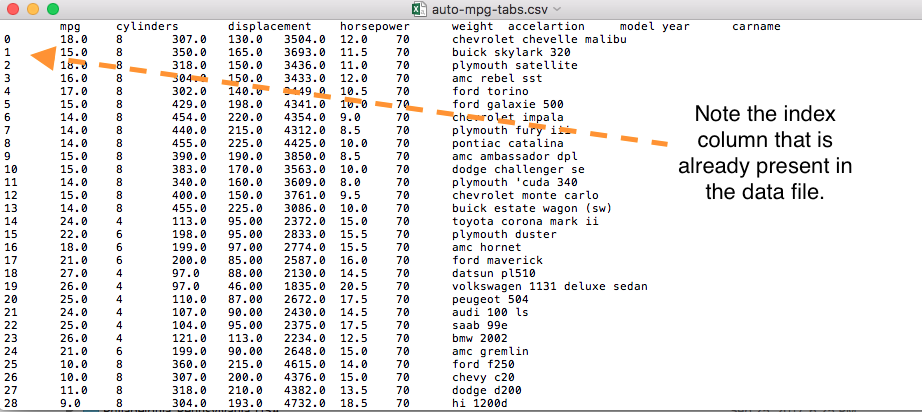

In [28]:
# Note how we use the index_col argument to read in the first column, in the data file, as the index.
autoMPGData = pd.read_csv(outPath, sep='\t', index_col=0)

Notice below that we no longer have the extra 'Unnamed: 0' column when we use .head() below to get the first few lines.

In [29]:
autoMPGData.head()

,mpg,cylinders,displacement,horsepower,weight,accelartion,model year,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino


#### Using .shape, .info() and describe() to better understand the data set.
Notice below how the horsepower data type is 'object' and not 'int64' or 'float64'.  Horsepower is a number, so we would expect the datatype to be an int or float.  But pandas as recognized it as 'object' (which means that pandas has recognized the column as a column of strings).  This is unexpected, and means that there probably is a string in the data! We will see what it is using some of the other methods we have learned.

In [30]:
autoMPGData.shape

(398, 8)

In [31]:
autoMPGData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
accelartion     398 non-null float64
model year      398 non-null int64
carname         398 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 28.0+ KB


In [32]:
autoMPGData.describe()

,mpg,cylinders,displacement,weight,accelartion,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


#### Taking a closer look at the hourspower column using .unique()
This is not the only way to find the bad value. But this is one way, using a method we have learned so far. We will see some other possibilities in coming lectures.

In [33]:
autoMPGData['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [34]:
autoMPGData.memory_usage()

Index           3184
mpg             3184
cylinders       3184
displacement    3184
horsepower      3184
weight          3184
accelartion     3184
model year      3184
carname         3184
dtype: int64

<a name='LoadingWhiteSpaceFile'></a>
# Loading A Data File With Fields Delimited By White Space
We will now look at one more data file. This file is from the isd-lite data that can be found here: <ftp://ftp.ncdc.noaa.gov/pub/data/noaa/isd-lite>

These files contain weather observations from weather stations all over the world.  We will look at the 2001 data for the station 724080-13739 which is a station at the Philadelphia International Airport.

This particular data is delimited by white space. White space can mean a number of things: tabs, spaces, new lines.  In this case it just means spaces; see the screen shot below.

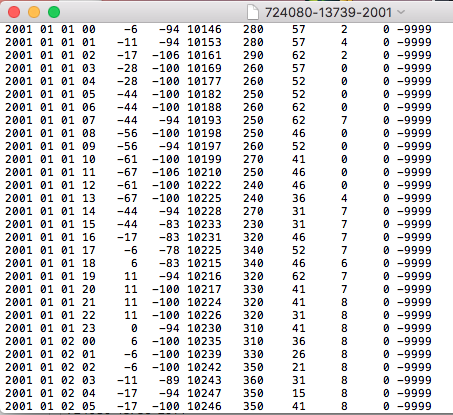

#### Introducing the 'delim_whitespace' argument
We can use a special argument when a datafile is separated by an undetermined amount of white space. That is, field could be separated by different number of spaces, or tabs and spaces etc..

In [47]:
filepath = ('/Users/williamhenry/Documents/UCI/Courses/IntroToPythonForDataScience/'
            'Course Material/data/Philadelphia_Pennsylvania_USA/724080-13739-2001')
weatherData = pd.read_csv(filepath, delim_whitespace=True)

In [48]:
weatherData.head()

,2001,01,01.1,00,-6,-94,10146,280,57,2,0,-9999
0,2001,1,1,1,-11,-94,10153,280,57,4,0,-9999
1,2001,1,1,2,-17,-106,10161,290,62,2,0,-9999
2,2001,1,1,3,-28,-100,10169,260,57,0,0,-9999
3,2001,1,1,4,-28,-100,10177,260,52,0,0,-9999
4,2001,1,1,5,-44,-100,10182,250,52,0,0,-9999


#### How to set column names for datafiles without column names.
Notice in the above cell, we see that pandas reads the first line as the column names. But, in this file, there are no names and the first line is data. There are two different strategies to solve this.

#### How to set column names by using the 'names' argument when we read in the data.
If we know what the column names should be, we can pass them to the names argument as a list, and pandas will automatically apply the names to the columns when it reads in the data.

We know what the column names should be, by looking at the data documentation which is here: <ftp://ftp.ncdc.noaa.gov/pub/data/noaa/isd-lite/isd-lite-format.pdf>

In [49]:
headers = ['Year', 'Month', 'Day', 'Hour', 'Air Temp', 'Dew Point Temp', 'Sea Level Pressure',
           'Wind Direction', 'Wind Speed Rate',
           'Sky Condition Total Coverage Code',
           'Liquid Precipitation Depth Dimension - 1Hr Duration',
           'Liquid Precipitation Depth Dimension - Six Hour Duration']
weatherData = pd.read_csv(filepath, delim_whitespace=True,
                          names=headers)

In [50]:
weatherData.head(2)

,Year,Month,Day,Hour,Air Temp,Dew Point Temp,Sea Level Pressure,Wind Direction,Wind Speed Rate,Sky Condition Total Coverage Code,Liquid Precipitation Depth Dimension - 1Hr Duration,Liquid Precipitation Depth Dimension - Six Hour Duration
0,2001,1,1,0,-6,-94,10146,280,57,2,0,-9999
1,2001,1,1,1,-11,-94,10153,280,57,4,0,-9999


#### Using the 'header' argument and setting the columns after we read in the file.
Another method is to use the 'header' argument to prevent pandas from reading in (and applying) any column names and then setting the columns names with the column attribute. See below how we set the header argument to None. The default value is 0, which means that pandas will try to read the first row as the header of the data file (the column names).  Remember that python is zero-indexed, so a value of 0 indicates the first row. By setting header to None we are "telling" .read_csv() that it should not treat any row as the headers when reading the file, and it will just number the columns 0 through 11.

When then set the columns attribute to be the list of column names the we defined above.

In [51]:
weatherData = pd.read_csv(filepath, delim_whitespace=True, header=None)
weatherData.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2001,1,1,0,-6,-94,10146,280,57,2,0,-9999
1,2001,1,1,1,-11,-94,10153,280,57,4,0,-9999
2,2001,1,1,2,-17,-106,10161,290,62,2,0,-9999
3,2001,1,1,3,-28,-100,10169,260,57,0,0,-9999
4,2001,1,1,4,-28,-100,10177,260,52,0,0,-9999


In [52]:
weatherData.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [53]:
weatherData.columns = headers
weatherData.head()

,Year,Month,Day,Hour,Air Temp,Dew Point Temp,Sea Level Pressure,Wind Direction,Wind Speed Rate,Sky Condition Total Coverage Code,Liquid Precipitation Depth Dimension - 1Hr Duration,Liquid Precipitation Depth Dimension - Six Hour Duration
0,2001,1,1,0,-6,-94,10146,280,57,2,0,-9999
1,2001,1,1,1,-11,-94,10153,280,57,4,0,-9999
2,2001,1,1,2,-17,-106,10161,290,62,2,0,-9999
3,2001,1,1,3,-28,-100,10169,260,57,0,0,-9999
4,2001,1,1,4,-28,-100,10177,260,52,0,0,-9999


#### What are the -9999 values?
You have probably noticed the -9999 values in the 'Liquid Precipitation Depth Dimension - Six Hour Duration' column.  Without knowing anything more, we should be very suspicious that this is a special value indicating a missing value.  If we look at the data documentation linked in a previous cell, we will see that -9999 is used as a missing value.  We will come back to missing values in a future lecture, and we will specifically look at this example.  For now, we note it and move on.

#### Using .shape, .dtypes(), .info(), and .describe() to take a closer look at the weather data.

In [54]:
weatherData.shape

(8758, 12)

In [55]:
weatherData.dtypes

Year                                                        int64
Month                                                       int64
Day                                                         int64
Hour                                                        int64
Air Temp                                                    int64
Dew Point Temp                                              int64
Sea Level Pressure                                          int64
Wind Direction                                              int64
Wind Speed Rate                                             int64
Sky Condition Total Coverage Code                           int64
Liquid Precipitation Depth Dimension - 1Hr Duration         int64
Liquid Precipitation Depth Dimension - Six Hour Duration    int64
dtype: object

In [56]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 12 columns):
Year                                                        8758 non-null int64
Month                                                       8758 non-null int64
Day                                                         8758 non-null int64
Hour                                                        8758 non-null int64
Air Temp                                                    8758 non-null int64
Dew Point Temp                                              8758 non-null int64
Sea Level Pressure                                          8758 non-null int64
Wind Direction                                              8758 non-null int64
Wind Speed Rate                                             8758 non-null int64
Sky Condition Total Coverage Code                           8758 non-null int64
Liquid Precipitation Depth Dimension - 1Hr Duration         8758 non-null int64
Liquid Precip

In [57]:
weatherData.describe()

,Year,Month,Day,Hour,Air Temp,Dew Point Temp,Sea Level Pressure,Wind Direction,Wind Speed Rate,Sky Condition Total Coverage Code,Liquid Precipitation Depth Dimension - 1Hr Duration,Liquid Precipitation Depth Dimension - Six Hour Duration
count,8758.0,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000
mean,2001.0,6.525006,15.720256,11.499087,137.899178,63.126399,10177.949418,-40.605275,36.875200,-99.449075,0.845170,-9663.490637
std,0.0,3.447779,8.796434,6.923071,145.037853,236.072243,227.109703,1560.749375,187.156708,1014.445394,6.527723,1803.496613
min,2001.0,1.000000,1.000000,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-1.000000,-9999.000000
25%,2001.0,4.000000,8.000000,5.250000,61.000000,-11.000000,10132.000000,110.000000,26.000000,2.000000,0.000000,-9999.000000
50%,2001.0,7.000000,16.000000,11.000000,139.000000,72.000000,10178.000000,220.000000,36.000000,4.000000,0.000000,-9999.000000
75%,2001.0,10.000000,23.000000,17.750000,222.000000,150.000000,10226.000000,290.000000,52.000000,8.000000,0.000000,-9999.000000
max,2001.0,12.000000,31.000000,23.000000,378.000000,261.000000,10408.000000,360.000000,170.000000,9.000000,262.000000,531.000000


#### Investigating The Sky Condition Total Coverage Code Using value_counts()

In [58]:
# 0 - No Clouds
# 2 - 2 Oktas
# 4 - 4 Oktas
# 6 - 6 Oktas
# 7 - 7 Oktas
# 8 - 8 Okta
# 9 - Sky obscured or cloud amount can not be estimated
# -9999 - Missing
weatherData['Sky Condition Total Coverage Code'].value_counts()

 8       2455
 0       1920
 4       1410
 7       1341
 2       1262
 6        256
-9999      91
 9         23
Name: Sky Condition Total Coverage Code, dtype: int64

In [59]:
# Here we devided by the total rows and multipled by 100 to get the % of each
# cloud cover type in the data.
(weatherData['Sky Condition Total Coverage Code'].value_counts()/8758.0) * 100

 8       28.031514
 0       21.922813
 4       16.099566
 7       15.311715
 2       14.409683
 6        2.923042
-9999     1.039050
 9        0.262617
Name: Sky Condition Total Coverage Code, dtype: float64

#### Note that many of the methods and attributes we have used return DataFrames or Series as output. 
A series is like a dataframe except that is one dimensional.
Note below how I show that the types of the returned output from the .value_counts() and .describe() methods are dataframes and series.  This is true for many of operations we will apply to dataframes. Just something to keep in mind as we continue to learn.

In [60]:
cloudCoverCounts = weatherData['Sky Condition Total Coverage Code'].value_counts()
type(cloudCoverCounts)

pandas.core.series.Series

In [61]:
weatherDataStats = weatherData.describe()
print(type(weatherDataStats))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
weatherDataStats.head()

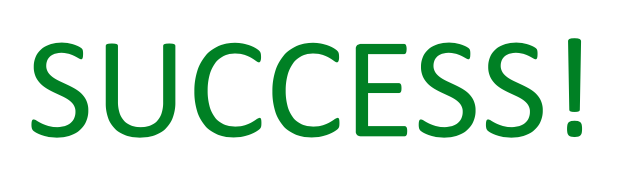

<a name='LessonSummary'></a>
# Lesson Summary:
In this lesson you learned about the following:
* Methods and attributes that help describe data files:
    * head(n) - get the first n rows
    * tail(n) - get the last n rows
    * sample(n) - get a random sample of n rows
    * shape - get the number of rows and columns
    * columns - get the column names
    * dtypes - get the variable types of each column
    * info() - get the variables types, non-null counts, and memory size of the dataframe
    * memory_usage() - get the memory usage of each column of the data frame
    * describe() - get basic summary statistics about each numerical column
    * unique() - get the unique values in a column
    * nunique() - get the number of unique values in a column
    * value_counts() - get the occurrence counts for each value in a column
<br>
<br>
* Arguments to the read_csv() method that help you read in various file types:
    * sep - an argument that allows you to specify the field separate used (we saw commas and tabs)
    * index_col - an argument to specify the column used as the index
    * names - an argument to specify column names
    * header - an argument to specify which row to use as the header
    * columns - an attribute that can be set, to change the column names of a dataframe
